# COE59410- Generative Deep Learning

## Homework 1

> Imran A. Zualkernan

The purpose of this homework is to learn how to use the GPU machines to run large models. In addition, build familiarity with the Keras framework and the associated tools.

## Deliverables

**You need to upload the following on ilearn (2 items)**

1. The Jupyter notebook in its original format.

2. A PDF of the Jupyter notebook for grading.

*Please do not upload a zipped file.* Upload each file separately. Each question is worth 25 points.

* Q1. Load and run the large_scale_processing v1.1 Jupyter notebook on the GPU machine and show how you can use tensorboard to monitor the runs remotely on your local machine.

* Q2. Modify the model in large_scale_processing v1.1 so that rather than a CNN, the model is a fully connected feedforward neural network. Fine tune the model to show your best results. Report and discuss all the results that are necessary to determine the goodness of your best model.

> Hint: Use the Reshape Layer in Keras.

* Q3. Use the following two call-backs on your best fully connected model and determine if you are able to improve the results. Clearly explain why or why not.
    1. LearningRateScheduler
    2. ReduceLROnPlateau

* Q4. Use the Keras Hypertune and Random optimizers (https://keras-team.github.io/keras-tuner/) to determine if you can improve the model by varying the number of layers, neurons in each layer and the learning rate.

    1. Plot the precision vs. recall of the best 20 models in one figure.
    2. Show a complete evaluation of the top two models.

## Group 2
* Huangjin Zhou, b00080932
* Eman Shaikh, G00086260
* Mueez Kan, b00068255

In [14]:
# Useful links
# https://www.hostinger.com/tutorials/ssh/basic-ssh-commands

In [15]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16129381520109573807
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7491026944
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11673379591900751093
physical_device_desc: "device: 0, name: Quadro RTX 4000, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [16]:
import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))
tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.list_physical_devices(device_type=None)
tf.test.is_gpu_available()
print(tf.test.is_built_with_cuda())

True


In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.layers import Reshape, Input, Dense, Dropout, Flatten, Activation,Concatenate
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras import backend, models
#import tensorflow_addons as tfa
import tensorflow as tf
print(tf.__version__)

# need to add these for the GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

2.4.1


In [18]:
# import the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#Setting the parameters for training

# batch size and image width to use
batch_size=128
width=100

# all the data directories
train_dir='train/'
test_dir='test/'
valid_dir='valid/'

# the number of epochs
num_epochs=10

# creating an image generator that will feed the data from
# each of the directories

# we use scaling transformation in this generator
generator=ImageDataGenerator(rescale=1./255)

# we specify the size of the input and batch size
# size of the input is necessary because the image
# needs to be rescaled for the neural network

train_data=generator.flow_from_directory(train_dir, target_size=(width,width),batch_size=batch_size)
valid_data=generator.flow_from_directory(valid_dir, target_size=(width,width),batch_size=batch_size)
test_data=generator.flow_from_directory(test_dir, target_size=(width,width),batch_size=batch_size)

# the number of steps per epoch is samples/batch size
# we need to use these numbers later

train_steps_per_epoch=math.ceil(train_data.samples/batch_size)
valid_steps_per_epoch=math.ceil(valid_data.samples/batch_size)
test_steps_per_epoch=math.ceil(test_data.samples/batch_size)
print(train_steps_per_epoch)
print(valid_steps_per_epoch)
print(test_steps_per_epoch)

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
276
10
10


> Q1. Load and run the large_scale_processing v1.1 Jupyter notebook on the GPU machine and
show how you can use tensorboard to monitor the runs remotely on your local machine.


```shell
$ jupyter notebook --port 9999 --NotebookApp.allow_remote_access=True
$ tensorboard --logdir logs/fit --port=8888
```
> Scalars
![Scalars](images/scalar.jpg)
![Graph](images/graph.jpg)
![Time Series](images/timeseries.jpg)

In [20]:
Q1 = False
if Q1:
    # the actual model should go here
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(width, width, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation='softmax'))
    model.summary()

In [21]:
if Q1:
    # Compile the model
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    # see if the model is good.
    print(model)

In [22]:
if Q1:
    print(valid_steps_per_epoch)
    num_epochs = 20
    # fit model and add tensor board callbacks
    from tensorflow.keras.callbacks import TensorBoard
    tensorboard = TensorBoard(log_dir='logs/fit')
    history=model.fit(train_data,
                  steps_per_epoch =train_steps_per_epoch,
                  validation_data=valid_data,
                  epochs=num_epochs,
                  validation_steps=valid_steps_per_epoch, callbacks=[tensorboard])



Q2. Modify the model in large_scale_processing v1.1 so that rather than a CNN,
the model is a fully connected feedforward neural network.
Fine tune the model to show your best results.
Report and discuss all the results that are necessary to determine the goodness of your best model.


> Hint: Use the Reshape Layer in Keras.

### adjust hidden units
we fix only 1 hidden layer and to see which unit number is best for us

```python
hidden_units = 128*1
```
```shell
 loss: 5.5032 - accuracy: 0.0087 - val_loss: 5.5339 - val_accuracy: 0.0040
```

```python
hidden_units = 128*2
```
```shell
 loss: 5.5122 - accuracy: 0.0076 - val_loss: 5.5246 - val_accuracy: 0.0040
```

```python
hidden_units = 128*4
```
```shell
 loss: 5.3341 - accuracy: 0.0126 - val_loss: 5.3179 - val_accuracy: 0.0120
```
```python
hidden_units = 128*8
```
```shell
 loss: 4.8888 - accuracy: 0.0391 - val_loss: 4.7778 - val_accuracy: 0.0336
```
```python
hidden_units = 128*16
```
```shell
 loss: 4.6924 - accuracy: 0.0555 - val_loss: 4.6376 - val_accuracy: 0.0520
```

```python
hidden_units = 128*32
```
```shell
 loss: 4.9463 - accuracy: 0.0294 - val_loss: 4.8971 - val_accuracy: 0.0312
```

from the report, we could make a conclusion
1. the val_accuracy on 128*32=4096 units is lower than on 128*16=2048, that is 0.0312 < 0.0312, we stop try more units.
2. the accuracy increased ratio from 1024 units to 2048 , which is 0.0520/0.0336=1.54, is less than that from 512 units to 1024,
which is 0.0336/0.0120=2.8. Therefore, if we have enough computation resources, we prefer 2048, otherwise 1024.

### adjust hidden layers

we fixed units number to 1024 or 2048, and then increase the layer number to see how many
layers work best

```python
hidden_units = 128*8

model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
...
```
```shell
loss: 4.2517 - accuracy: 0.0861 - val_loss: 4.1615 - val_accuracy: 0.0952
```


```python
hidden_units = 128*16
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
...
```
```shell
loss: 5.5034 - accuracy: 0.0085 - val_loss: 5.5354 - val_accuracy: 0.0040
```
stop trying 128*16 units for one layer since accuracy doesn't increase

```python
hidden_units = 128*8
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
```
```shell
 loss: 3.1438 - accuracy: 0.2647 - val_loss: 3.4928 - val_accuracy: 0.2296
```

```python
hidden_units = 128*8
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
```
```shell
 loss: 3.2843 - accuracy: 0.2326 - val_loss: 3.5376 - val_accuracy: 0.2080
```

##### conclusion
1. units of 2048 for single layer is too much, because the accuracy of two dense layer goes
lower than that of single layer, which stops at 0.0040
2. 3 dense layers are best match with 1024 units number, since the accuracy of 4 layers
goes lower than that of 3 layers, which is 0.2080 < 0.2296

### try more epochs

we set epoch number to 10 just to find hyperparameters quickly, however, this epoch is
not enough since the accuracy keeps going up, we will enlarge this number and observe
the accuracy until it converges

```python
num_epochs = 10*10

hidden_units = 128*8

model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
```
```shell
Epoch 20/100
loss: 1.3170 - accuracy: 0.6387 - val_loss: 4.6068 - val_accuracy: 0.2816
...
Epoch 30/100
loss: 0.4543 - accuracy: 0.8656 - val_loss: 7.4723 - val_accuracy: 0.2720
```

conclusion:
the accuracy reaches to top of 0.2816 at epoch 20, so we assume 20 epochs is enough

we sum up, hidden units, layer number, epoch number, and the final code is as below:

In [23]:
Q2 = False
Q3 = False
if Q2 or Q3:
    num_epochs = 20

    # try different units

    num_labels = train_data.num_classes

    hidden_units = 1024
    model = Sequential()
    model.add(Reshape((-1,), input_shape=(width, width, 3)))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    model.summary()

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # see if the model is good.
    print(model)

if Q2 :
    history=model.fit(train_data,
                      steps_per_epoch =train_steps_per_epoch,
                      validation_data=valid_data,
                      epochs=num_epochs,
                      validation_steps=valid_steps_per_epoch)

Q3. Use the following two call-backs on your best fully connected model and determine if you are able to
improve the results. Clearly explain why or why not.
    1. LearningRateScheduler
    2. ReduceLROnPlateau

### LearningRateScheduler
from the accuracy of Q2, we would see the accuracy drops from 0.2128 to 0.1944 within epochs 6 to 8, this drop is
probably because learning rate is too big, so try to tune LR to increase the accuracy

so we have two directions to find the best learning rate as follows, we take the outcome from Q2 as baseline,
and we only try 5 epoch for efficiency

#### baseline
```
Epoch 5/20
loss: 3.9027 - accuracy: 0.1498 - val_loss: 3.7048 - val_accuracy: 0.1664
```

#### find the best consistent learning rate
we tried a fixed LR from 1e-1 to 1e-10 to see which one is the best

```python
    lr = 1e-1
```
```
 loss: 5.5387 - accuracy: 0.0057 - val_loss: 5.5664 - val_accuracy: 0.0040
```

```python
    lr = 1e-2
```
```
  loss: 4.8003 - accuracy: 0.0375 - val_loss: 4.6560 - val_accuracy: 0.0424
```

```python
    lr = 1e-3
```
```
 loss: 3.8051 - accuracy: 0.1694 - val_loss: 3.7018 - val_accuracy: 0.1792
```

```python
    lr = 1e-4
```
```
 loss: 3.8836 - accuracy: 0.1757 - val_loss: 3.7352 - val_accuracy: 0.1816
```

```python
    lr = 1e-5
```
```
 loss: 4.6433 - accuracy: 0.0939 - val_loss: 4.5639 - val_accuracy: 0.0976
```

##### Conclusion
The accuracy goes lower when LR equals 1e-5, so the best LR would be within 1e-4 and 1e-5

#### find the best dynamic learning rate
since the best LR would be within 1e-4 and 1e-5, there must be a turning point at a specific epoch.
we run a 20-epoch experiment to find this turning point and make LR below it use LR=1e-4 and LR=1e-5
for the rest.



for LR=1e-4
```python
    num_epochs = 20
    lr = 1e-4
```
```shell
Epoch 10/20
poch 9/20
 loss: 3.2539 - accuracy: 0.2798 - val_loss: 3.2876 - val_accuracy: 0.2592
Epoch 10/20
 loss: 3.1296 - accuracy: 0.3019 - val_loss: 3.2010 - val_accuracy: 0.2776
Epoch 11/20
 loss: 2.9819 - accuracy: 0.3284 - val_loss: 3.2834 - val_accuracy: 0.2552
Epoch 12/20
```
we could see the turning point was at Epoch 10.

for LR=1e-4
the general performance is better than 1e-4, and even we get a new high at 33.52% accuracy

```shell
Epoch 19/20
 loss: 2.1844 - accuracy: 0.4862 - val_loss: 2.9645 - val_accuracy: 0.3352
```

So we could make 1e-4 as the LR for the first 10 epochs and 1e-5 for the rest

```python
    # starting point
    lr = 1e-4
    # dynamic
    if epoch > 10:
        lr = 1e-5
```
however, the max accuracy is only 0.3064, lower than consistent LR of 1e-4, which is 33.52%
```shell
Epoch 20/20
 loss: 2.6335 - accuracy: 0.4074 - val_loss: 2.9782 - val_accuracy: 0.3064
```


#### Conclusion
The possible reason is that for the gradient descending algorithm, we could only find local optimization,
not the global one. So, the epoch 10 drops in local optimization point.


So, we will drop this dynamic LR optimization and stick to the previous one, which is that the LR is a consistent
number 1e-4.


### ReduceLROnPlateau
Now we could add a reducer, since we don't find an apparent plateau in the 20 epochs, we tried 100 epoch to see if it works.
The min LR is 1e-6, 1% of the basic LR 1e-4 is reasonable from our aspect.


```python
num_epochs = 10*10

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=1e-6)
```

Since the patience is 5, which means the learning rate will be reduced once there is no improvement in 5 epochs.
It works as expected, take a look at the first example.

Epoch 22 is a turning point, so we would expect the accuracy of epoch 24 is highly likely to be lower than that of
epoch 23, however, after ajudsting the learning rate, accuracy of Epoch 24 goes up as a new top, which is 0.3544

```shell
Epoch 21/100
 loss: 1.9319 - accuracy: 0.5408 - val_loss: 2.9627 - val_accuracy: 0.3440
Epoch 22/100
 loss: 1.8510 - accuracy: 0.5583 - val_loss: 2.9558 - val_accuracy: 0.3488
Epoch 23/100
 loss: 1.7744 - accuracy: 0.5757 - val_loss: 3.0351 - val_accuracy: 0.3296

Epoch 00023: ReduceLROnPlateau reducing learning rate to 3.1622775802825264e-05.
Epoch 24/100
 loss: 1.6634 - accuracy: 0.6005 - val_loss: 2.9863 - val_accuracy: 0.3544
```

This optimization did a great job, we break a new record at epoch 86, which is **0.3928**
```
Epoch 86/100
loss: 0.0059 - accuracy: 0.9999 - val_loss: 5.4967 - val_accuracy: 0.3928
```


In [24]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
if Q3:


    # static
    def lr_schedule(epoch):
        lr = 1e-4

        # dynamic optimization, abandoned due to bad performance
        # if epoch > 10:
        #     lr = 1e-5

        return lr

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-6)

    callbacks = [lr_reducer, lr_scheduler]
    history=model.fit(train_data,
                  steps_per_epoch =train_steps_per_epoch,
                  validation_data=valid_data,
                  epochs=num_epochs,
                  validation_steps=valid_steps_per_epoch, callbacks=callbacks)

Q4. Use the Keras Hypertune and Random optimizers (https://keras-team.github.io/keras-tuner/) to determine
if you can improve the model by varying the number of layers, neurons in each layer and the learning rate.

1. Plot the precision vs. recall of the best 20 models in one figure.
2. Show a complete evaluation of the top two models.


first, we need to install keras-tuner
```shell
$ conda install -c conda-forge keras-tuner

```

### Random Search
1. Since the best units number we have found manually is 1024, within 512 and 2048, so we fill the two
with min and max value
2. Since the best learning rate we've found manually is , within 1e-3 and 1e-5, so we will try
1e-3, 1e-4, 1e-5
3. To improve efficiency, we just try 3 epochs for each combination
4. We fit the best 20 models with 5 epochs to plot the chart and 10 epochs to evaluate the top 2.

### Hyper Band
We compared the general performance between Random Search and Hyper Band. Surprisingly, the Hyper Band worked much worse than
Random Search, so we didn't try Hyper Band anymore, all the outcomes come from Random Search.


The score is only 0.004
```
Results summary
|-Results in my_dir/hyperband
|-Showing 10 best trials
|-Objective(name='val_accuracy', direction='max')
Trial summary
|-Trial ID: 1f24cc1576561684c9e3f8ef94220c8b
|-Score: 0.004000000189989805
|-Best step: 0
Hyperparameters:
|-conv3_depth: 4
|-conv4_depth: 36
|-learning_rate: 0.001
|-optimizer: adam
|-pooling: max
|-tuner/bracket: 0
|-tuner/epochs: 1
|-tuner/initial_epoch: 0
|-tuner/round: 0
|-version: v2
```

In [25]:
Q4 = True
from keras import backend as K
from keras import metrics

def create_model(units, lr):
    m = Sequential()
    m.add(Reshape((-1,), input_shape=(width, width, 3)))
    m.add(Dense(units, activation='relu'))
    m.add(Dense(units, activation='relu'))
    m.add(Dense(units, activation='relu'))
    m.add(Dense(train_data.num_classes, activation='softmax'))

    m.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy',
                   metrics.AUC(name='auc'),
                   metrics.Precision(name='precision'),
                   metrics.Recall(name='recall'),
                   F1_Score])
    return m

def plot_p_r(m, epochs):
    h=m.fit(train_data,
                  steps_per_epoch =train_steps_per_epoch,
                  validation_data=valid_data,
                  epochs=epochs,
                  validation_steps=valid_steps_per_epoch
                  )
    # Plot accuracy vs. prevision
    plt.plot(h.history['precision'],h.history['recall'],'o', color='black',label='precision vs. recall')
    plt.plot(h.history['val_precision'],h.history['val_recall'],'o', color='red',label='val_precision vs. val_recall')
    plt.title('Model Precision and Recall')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend()
    plt.show()

def evaluate(m):
    # Evaluate against test data.
    scores = m.evaluate(test_data, verbose=1)

    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    print('Test AUC:', scores[2])
    print('Test precision:', scores[3])
    print('Test recall:', scores[4])
    print('Test F1-Score:', scores[5])

def F1_Score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

num_labels = train_data.num_classes
tries = 30
num_epochs = 3
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Reshape((-1,), input_shape=(width, width, 3)))
    model.add(Dense(units=hp.Int('units',
                                        min_value=512,
                                        max_value=2048,
                                        step=128),
                           activation='relu'))
    model.add(Dense(units=hp.Int('units',
                                        min_value=512,
                                        max_value=2048,
                                        step=128),
                           activation='relu'))
    model.add(Dense(units=hp.Int('units',
                                        min_value=512,
                                        max_value=2048,
                                        step=128),
                           activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate',
                      values=[1e-3, 1e-4, 1e-5])),
        loss='categorical_crossentropy',
        metrics=['accuracy',
                   metrics.AUC(name='auc'),
                   metrics.Precision(name='precision'),
                   metrics.Recall(name='recall'),
                   F1_Score]
    )
    return model

def random_search():
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=tries,
        executions_per_trial=1,
        directory='my_dir',
        project_name='randomsearch')

    tuner.search_space_summary()

    tuner.search(train_data,
                  steps_per_epoch =train_steps_per_epoch,
                  validation_data=valid_data,
                  epochs=num_epochs,
                  validation_steps=valid_steps_per_epoch)
    tuner.results_summary()

    return tuner.get_best_models(20)

#random_models =  random_search()

def hyper_band():
    from kerastuner.applications import HyperResNet
    from kerastuner.tuners import Hyperband

    hypermodel = HyperResNet(input_shape=(width, width, 3), classes=num_labels)

    tuner = Hyperband(
        hypermodel,
        objective='val_accuracy',
        max_epochs=10,
        metrics=['accuracy',
                   metrics.AUC(name='auc'),
                   metrics.Precision(name='precision'),
                   metrics.Recall(name='recall'),
                   F1_Score],
        directory='my_dir',
        project_name='hyperband')

    tuner.search(train_data,
                  steps_per_epoch =train_steps_per_epoch,
                  validation_data=valid_data,
                  epochs=num_epochs,
                  validation_steps=valid_steps_per_epoch)

    tuner.results_summary()
    return tuner.get_best_models(tries)

#hyper_models = hyper_band()

Epoch 1/5


 65/276 [======>.......................] - ETA: 3:10 - loss: 5.5487 - accuracy: 0.0000e+00 - auc: 0.5028 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 26s - loss: 5.6068 - accuracy: 0.0020 - auc: 0.5021 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+00     - ETA: 26s - loss: 5.6516 - accuracy: 0.0022 - auc: 0.5002 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.6685 - accuracy: 0.0026 - auc: 0.5024 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.6820 - accuracy: 0.0027 - auc: 0.5041 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.6951 - accuracy: 0.0027 - auc: 0.5048 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.7023 - accuracy: 0.0026 - auc: 0.5059 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.7072 - accuracy: 0.0027 - auc: 0.5068 - precisi

197/276 [====================>.........] - ETA: 13s - loss: 5.5829 - accuracy: 0.0084 - auc: 0.5307 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5821 - accuracy: 0.0085 - auc: 0.5309 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5814 - accuracy: 0.0085 - auc: 0.5311 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5806 - accuracy: 0.0085 - auc: 0.5313 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5798 - accuracy: 0.0085 - auc: 0.5315 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5791 - accuracy: 0.0086 - auc: 0.5317 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5783 - accuracy: 0.0086 - auc: 0.5319 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5776 - accuracy: 0.0086 - auc: 0.5321 - precision: 0.000

263/276 [===========================>..] - ETA: 7s - loss: 5.5352 - accuracy: 0.0102 - auc: 0.5441 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5345 - accuracy: 0.0103 - auc: 0.5443 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5338 - accuracy: 0.0103 - auc: 0.5445 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5331 - accuracy: 0.0103 - auc: 0.5447 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5324 - accuracy: 0.0104 - auc: 0.5449 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5317 - accuracy: 0.0104 - auc: 0.5451 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 6s - loss: 5.5310 - accuracy: 0.0104 - auc: 0.5453 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 6s - loss: 5.5303 - accuracy: 0.0105 - auc: 0.5455 - precision: 0.0000e+00 - recall:

276/276 [==============================] - ETA: 1s - loss: 5.4894 - accuracy: 0.0122 - auc: 0.5580 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 1s - loss: 5.4887 - accuracy: 0.0122 - auc: 0.5582 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4880 - accuracy: 0.0123 - auc: 0.5584 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4873 - accuracy: 0.0123 - auc: 0.5586 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4866 - accuracy: 0.0123 - auc: 0.5588 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4859 - accuracy: 0.0123 - auc: 0.5590 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4852 - accuracy: 0.0124 - auc: 0.5592 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 0s - loss: 5.4845 - accuracy: 0.0124 - auc: 0.5594 - precision: 0.0000e+00 - recall:

 68/276 [======>.......................] - ETA: 33s - loss: 4.9208 - accuracy: 0.0469 - auc: 0.7424 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 32s - loss: 4.8905 - accuracy: 0.0449 - auc: 0.7434 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 29s - loss: 4.8787 - accuracy: 0.0447 - auc: 0.7448 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 27s - loss: 4.8772 - accuracy: 0.0433 - auc: 0.7422 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 27s - loss: 4.8765 - accuracy: 0.0428 - auc: 0.7403 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.8693 - accuracy: 0.0439 - auc: 0.7397 - precision: 0.1667 - recall: 2.1701e-04 - F1_Score: 4.3066e-04    - ETA: 26s - loss: 4.8645 - accuracy: 0.0445 - auc: 0.7392 - precision: 0.2857 - recall: 3.4545e-04 - F1_Score: 6.8555e-0 - ETA: 26s - loss: 4.8624 - accuracy: 0.0446 - auc: 0.7389 - precision: 0.3750 - 

206/276 [=====================>........] - ETA: 13s - loss: 4.8137 - accuracy: 0.0515 - auc: 0.7462 - precision: 0.3224 - recall: 5.7280e-04 - F1_Score: 0.001 - ETA: 13s - loss: 4.8132 - accuracy: 0.0516 - auc: 0.7463 - precision: 0.3234 - recall: 5.7567e-04 - F1_Score: 0.001 - ETA: 13s - loss: 4.8126 - accuracy: 0.0516 - auc: 0.7464 - precision: 0.3244 - recall: 5.7844e-04 - F1_Score: 0.001 - ETA: 13s - loss: 4.8121 - accuracy: 0.0517 - auc: 0.7465 - precision: 0.3254 - recall: 5.8153e-04 - F1_Score: 0.001 - ETA: 12s - loss: 4.8116 - accuracy: 0.0518 - auc: 0.7466 - precision: 0.3264 - recall: 5.8453e-04 - F1_Score: 0.001 - ETA: 12s - loss: 4.8110 - accuracy: 0.0518 - auc: 0.7467 - precision: 0.3273 - recall: 5.8743e-04 - F1_Score: 0.001 - ETA: 12s - loss: 4.8105 - accuracy: 0.0519 - auc: 0.7468 - precision: 0.3283 - recall: 5.9062e-04 - F1_Score: 0.001 - ETA: 12s - loss: 4.8100 - accuracy: 0.0519 - auc: 0.7469 - precision: 0.3294 - recall: 5.9372e-04 - F1_Score: 0.001 - ETA: 12s - lo

276/276 [==============================] - ETA: 6s - loss: 4.7809 - accuracy: 0.0548 - auc: 0.7520 - precision: 0.3732 - recall: 7.3676e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7805 - accuracy: 0.0548 - auc: 0.7521 - precision: 0.3735 - recall: 7.3830e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7801 - accuracy: 0.0549 - auc: 0.7522 - precision: 0.3738 - recall: 7.3979e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7796 - accuracy: 0.0549 - auc: 0.7523 - precision: 0.3741 - recall: 7.4125e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7792 - accuracy: 0.0549 - auc: 0.7523 - precision: 0.3745 - recall: 7.4303e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7788 - accuracy: 0.0550 - auc: 0.7524 - precision: 0.3749 - recall: 7.4476e-04 - F1_Score: 0.00 - ETA: 6s - loss: 4.7784 - accuracy: 0.0550 - auc: 0.7525 - precision: 0.3753 - recall: 7.4679e-04 - F1_Score: 0.00 - ETA: 5s - loss: 4.7780 - accuracy: 0.0551 - auc: 0.7526 - precision: 0.3758 - recall: 7.4879e-04 - F1_Score: 0.00 - ETA: 5s - loss: 4.7775 - accu

Epoch 3/5


 72/276 [======>.......................] - ETA: 32s - loss: 4.5732 - accuracy: 0.0859 - auc: 0.7918 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 28s - loss: 4.5163 - accuracy: 0.0938 - auc: 0.7968 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 27s - loss: 4.5079 - accuracy: 0.0946 - auc: 0.7957 - precision: 0.1111 - recall: 8.6806e-04 - F1_Score: 0.0017        - ETA: 27s - loss: 4.5089 - accuracy: 0.0944 - auc: 0.7951 - precision: 0.1667 - recall: 0.0011 - F1_Score: 0.0023    - ETA: 27s - loss: 4.5108 - accuracy: 0.0936 - auc: 0.7951 - precision: 0.2000 - recall: 0.0012 - F1_Score: 0.002 - ETA: 26s - loss: 4.5093 - accuracy: 0.0928 - auc: 0.7955 - precision: 0.2500 - recall: 0.0015 - F1_Score: 0.002 - ETA: 26s - loss: 4.5106 - accuracy: 0.0918 - auc: 0.7955 - precision: 0.2857 - recall: 0.0016 - F1_Score: 0.003 - ETA: 26s - loss: 4.5109 - accuracy: 0.0913 - auc: 0.7957 - precision: 0.3125 - recall: 0.0016 - F1_Score: 0.003 - ETA: 

218/276 [======================>.......] - ETA: 12s - loss: 4.3937 - accuracy: 0.0988 - auc: 0.8114 - precision: 0.6113 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3933 - accuracy: 0.0989 - auc: 0.8114 - precision: 0.6113 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3929 - accuracy: 0.0989 - auc: 0.8114 - precision: 0.6114 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3925 - accuracy: 0.0990 - auc: 0.8115 - precision: 0.6114 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3922 - accuracy: 0.0990 - auc: 0.8115 - precision: 0.6114 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3918 - accuracy: 0.0990 - auc: 0.8115 - precision: 0.6114 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3914 - accuracy: 0.0991 - auc: 0.8116 - precision: 0.6113 - recall: 0.0046 - F1_Score: 0.009 - ETA: 12s - loss: 4.3911 - accuracy: 0.0991 - auc: 0.8116 - precision: 0.6113 - recall: 0.0047 - F1_Score: 0.009 - ETA: 11s - loss: 4.3907 - accuracy: 0.0992 - 

276/276 [==============================] - ETA: 5s - loss: 4.3671 - accuracy: 0.1022 - auc: 0.8140 - precision: 0.6070 - recall: 0.0053 - F1_Score: 0.01 - ETA: 5s - loss: 4.3667 - accuracy: 0.1023 - auc: 0.8140 - precision: 0.6070 - recall: 0.0053 - F1_Score: 0.01 - ETA: 5s - loss: 4.3664 - accuracy: 0.1023 - auc: 0.8141 - precision: 0.6069 - recall: 0.0053 - F1_Score: 0.01 - ETA: 5s - loss: 4.3661 - accuracy: 0.1024 - auc: 0.8141 - precision: 0.6069 - recall: 0.0053 - F1_Score: 0.01 - ETA: 5s - loss: 4.3657 - accuracy: 0.1024 - auc: 0.8141 - precision: 0.6069 - recall: 0.0054 - F1_Score: 0.01 - ETA: 5s - loss: 4.3654 - accuracy: 0.1024 - auc: 0.8142 - precision: 0.6068 - recall: 0.0054 - F1_Score: 0.01 - ETA: 4s - loss: 4.3651 - accuracy: 0.1025 - auc: 0.8142 - precision: 0.6068 - recall: 0.0054 - F1_Score: 0.01 - ETA: 4s - loss: 4.3647 - accuracy: 0.1025 - auc: 0.8142 - precision: 0.6068 - recall: 0.0054 - F1_Score: 0.01 - ETA: 4s - loss: 4.3644 - accuracy: 0.1026 - auc: 0.8143 - pre

 72/276 [======>.......................] - ETA: 33s - loss: 4.0371 - accuracy: 0.1797 - auc: 0.8579 - precision: 0.3333 - recall: 0.0078 - F1_Score: 0.015 - ETA: 26s - loss: 4.0532 - accuracy: 0.1699 - auc: 0.8565 - precision: 0.5238 - recall: 0.0137 - F1_Score: 0.026 - ETA: 26s - loss: 4.0280 - accuracy: 0.1706 - auc: 0.8578 - precision: 0.6270 - recall: 0.0178 - F1_Score: 0.034 - ETA: 26s - loss: 4.0255 - accuracy: 0.1709 - auc: 0.8571 - precision: 0.6845 - recall: 0.0192 - F1_Score: 0.037 - ETA: 26s - loss: 4.0314 - accuracy: 0.1702 - auc: 0.8551 - precision: 0.6950 - recall: 0.0197 - F1_Score: 0.038 - ETA: 25s - loss: 4.0265 - accuracy: 0.1713 - auc: 0.8542 - precision: 0.7010 - recall: 0.0206 - F1_Score: 0.039 - ETA: 25s - loss: 4.0284 - accuracy: 0.1711 - auc: 0.8525 - precision: 0.7080 - recall: 0.0210 - F1_Score: 0.040 - ETA: 25s - loss: 4.0306 - accuracy: 0.1702 - auc: 0.8510 - precision: 0.7093 - recall: 0.0212 - F1_Score: 0.041 - ETA: 25s - loss: 4.0331 - accuracy: 0.1689 - 

217/276 [======================>.......] - ETA: 12s - loss: 3.9772 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6954 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9771 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6954 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9771 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6953 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9770 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6952 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9769 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6952 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9768 - accuracy: 0.1595 - auc: 0.8522 - precision: 0.6951 - recall: 0.0207 - F1_Score: 0.039 - ETA: 12s - loss: 3.9767 - accuracy: 0.1596 - auc: 0.8522 - precision: 0.6951 - recall: 0.0207 - F1_Score: 0.040 - ETA: 12s - loss: 3.9766 - accuracy: 0.1596 - auc: 0.8523 - precision: 0.6950 - recall: 0.0207 - F1_Score: 0.040 - ETA: 11s - loss: 3.9765 - accuracy: 0.1596 - 

276/276 [==============================] - ETA: 5s - loss: 3.9700 - accuracy: 0.1604 - auc: 0.8531 - precision: 0.6931 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9699 - accuracy: 0.1604 - auc: 0.8531 - precision: 0.6931 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9698 - accuracy: 0.1605 - auc: 0.8531 - precision: 0.6931 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9697 - accuracy: 0.1605 - auc: 0.8531 - precision: 0.6931 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9696 - accuracy: 0.1605 - auc: 0.8531 - precision: 0.6930 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9695 - accuracy: 0.1605 - auc: 0.8532 - precision: 0.6930 - recall: 0.0214 - F1_Score: 0.04 - ETA: 5s - loss: 3.9694 - accuracy: 0.1605 - auc: 0.8532 - precision: 0.6930 - recall: 0.0215 - F1_Score: 0.04 - ETA: 4s - loss: 3.9694 - accuracy: 0.1605 - auc: 0.8532 - precision: 0.6930 - recall: 0.0215 - F1_Score: 0.04 - ETA: 4s - loss: 3.9693 - accuracy: 0.1605 - auc: 0.8532 - pre

 72/276 [======>.......................] - ETA: 33s - loss: 3.8762 - accuracy: 0.1719 - auc: 0.8571 - precision: 0.7500 - recall: 0.0234 - F1_Score: 0.045 - ETA: 26s - loss: 3.8433 - accuracy: 0.1758 - auc: 0.8629 - precision: 0.7500 - recall: 0.0234 - F1_Score: 0.045 - ETA: 26s - loss: 3.8172 - accuracy: 0.1797 - auc: 0.8658 - precision: 0.7222 - recall: 0.0243 - F1_Score: 0.047 - ETA: 26s - loss: 3.7989 - accuracy: 0.1816 - auc: 0.8677 - precision: 0.7202 - recall: 0.0256 - F1_Score: 0.049 - ETA: 25s - loss: 3.7824 - accuracy: 0.1859 - auc: 0.8690 - precision: 0.7246 - recall: 0.0276 - F1_Score: 0.053 - ETA: 26s - loss: 3.7749 - accuracy: 0.1888 - auc: 0.8694 - precision: 0.7320 - recall: 0.0295 - F1_Score: 0.056 - ETA: 26s - loss: 3.7699 - accuracy: 0.1907 - auc: 0.8699 - precision: 0.7378 - recall: 0.0307 - F1_Score: 0.058 - ETA: 26s - loss: 3.7634 - accuracy: 0.1925 - auc: 0.8705 - precision: 0.7425 - recall: 0.0315 - F1_Score: 0.060 - ETA: 25s - loss: 3.7601 - accuracy: 0.1938 - 

217/276 [======================>.......] - ETA: 12s - loss: 3.7402 - accuracy: 0.1912 - auc: 0.8734 - precision: 0.7063 - recall: 0.0360 - F1_Score: 0.068 - ETA: 12s - loss: 3.7401 - accuracy: 0.1912 - auc: 0.8734 - precision: 0.7061 - recall: 0.0360 - F1_Score: 0.068 - ETA: 12s - loss: 3.7400 - accuracy: 0.1912 - auc: 0.8735 - precision: 0.7059 - recall: 0.0360 - F1_Score: 0.068 - ETA: 12s - loss: 3.7399 - accuracy: 0.1912 - auc: 0.8735 - precision: 0.7057 - recall: 0.0360 - F1_Score: 0.068 - ETA: 12s - loss: 3.7398 - accuracy: 0.1912 - auc: 0.8735 - precision: 0.7054 - recall: 0.0360 - F1_Score: 0.068 - ETA: 12s - loss: 3.7397 - accuracy: 0.1912 - auc: 0.8735 - precision: 0.7052 - recall: 0.0360 - F1_Score: 0.067 - ETA: 12s - loss: 3.7396 - accuracy: 0.1912 - auc: 0.8735 - precision: 0.7050 - recall: 0.0360 - F1_Score: 0.067 - ETA: 12s - loss: 3.7395 - accuracy: 0.1913 - auc: 0.8735 - precision: 0.7048 - recall: 0.0360 - F1_Score: 0.067 - ETA: 11s - loss: 3.7393 - accuracy: 0.1913 - 

276/276 [==============================] - ETA: 5s - loss: 3.7331 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6960 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7330 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6960 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7329 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6959 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7329 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6958 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7328 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6958 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7327 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6957 - recall: 0.0359 - F1_Score: 0.06 - ETA: 5s - loss: 3.7327 - accuracy: 0.1922 - auc: 0.8737 - precision: 0.6956 - recall: 0.0359 - F1_Score: 0.06 - ETA: 4s - loss: 3.7326 - accuracy: 0.1923 - auc: 0.8737 - precision: 0.6955 - recall: 0.0359 - F1_Score: 0.06 - ETA: 4s - loss: 3.7325 - accuracy: 0.1923 - auc: 0.8737 - pre

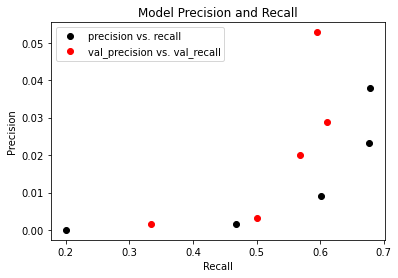

10/10 [==============================] - ETA: 1s - loss: 3.2758 - accuracy: 0.2188 - auc: 0.9217 - precision: 0.8750 - recall: 0.0547 - F1_Score: 0.10 - ETA: 0s - loss: 3.4261 - accuracy: 0.1914 - auc: 0.9026 - precision: 0.7143 - recall: 0.0391 - F1_Score: 0.07 - ETA: 0s - loss: 3.5757 - accuracy: 0.1823 - auc: 0.8860 - precision: 0.6316 - recall: 0.0312 - F1_Score: 0.05 - ETA: 0s - loss: 3.5282 - accuracy: 0.1934 - auc: 0.8911 - precision: 0.6800 - recall: 0.0332 - F1_Score: 0.06 - ETA: 0s - loss: 3.5307 - accuracy: 0.1891 - auc: 0.8903 - precision: 0.6857 - recall: 0.0375 - F1_Score: 0.07 - ETA: 0s - loss: 3.4722 - accuracy: 0.2083 - auc: 0.8912 - precision: 0.7500 - recall: 0.0547 - F1_Score: 0.09 - ETA: 0s - loss: 3.4966 - accuracy: 0.2109 - auc: 0.8894 - precision: 0.6812 - recall: 0.0525 - F1_Score: 0.09 - ETA: 0s - loss: 3.5169 - accuracy: 0.2070 - auc: 0.8880 - precision: 0.6667 - recall: 0.0488 - F1_Score: 0.08 - ETA: 0s - loss: 3.5409 - accuracy: 0.2023 - auc: 0.8852 - preci

 65/276 [======>.......................] - ETA: 2:50 - loss: 5.5602 - accuracy: 0.0078 - auc: 0.4988 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 26s - loss: 5.6285 - accuracy: 0.0078 - auc: 0.4959 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+00 - ETA: 26s - loss: 5.6653 - accuracy: 0.0069 - auc: 0.4929 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.6980 - accuracy: 0.0062 - auc: 0.4908 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.7183 - accuracy: 0.0059 - auc: 0.4895 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 5.7265 - accuracy: 0.0060 - auc: 0.4907 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 25s - loss: 5.7353 - accuracy: 0.0059 - auc: 0.4907 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 25s - loss: 5.7416 - accuracy: 0.0058 - auc: 0.4910 - precision: 0.00

197/276 [====================>.........] - ETA: 13s - loss: 5.5974 - accuracy: 0.0070 - auc: 0.5230 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5967 - accuracy: 0.0070 - auc: 0.5233 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5959 - accuracy: 0.0070 - auc: 0.5235 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5951 - accuracy: 0.0071 - auc: 0.5237 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5944 - accuracy: 0.0071 - auc: 0.5239 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5936 - accuracy: 0.0071 - auc: 0.5241 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5928 - accuracy: 0.0071 - auc: 0.5244 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 13s - loss: 5.5921 - accuracy: 0.0072 - auc: 0.5246 - precision: 0.000

264/276 [===========================>..] - ETA: 7s - loss: 5.5487 - accuracy: 0.0089 - auc: 0.5377 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5480 - accuracy: 0.0089 - auc: 0.5380 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5473 - accuracy: 0.0089 - auc: 0.5382 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5466 - accuracy: 0.0090 - auc: 0.5384 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5459 - accuracy: 0.0090 - auc: 0.5386 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 7s - loss: 5.5452 - accuracy: 0.0090 - auc: 0.5389 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 6s - loss: 5.5445 - accuracy: 0.0091 - auc: 0.5391 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+ - ETA: 6s - loss: 5.5438 - accuracy: 0.0091 - auc: 0.5393 - precision: 0.0000e+00 - recall:

276/276 [==============================] - ETA: 1s - loss: 5.5014 - accuracy: 0.0111 - auc: 0.5526 - precision: 0.0679 - recall: 2.0769e-06 - F1_Score: 4.1073e- - ETA: 0s - loss: 5.5007 - accuracy: 0.0112 - auc: 0.5528 - precision: 0.0714 - recall: 2.1798e-06 - F1_Score: 4.3110e- - ETA: 0s - loss: 5.5000 - accuracy: 0.0112 - auc: 0.5530 - precision: 0.0749 - recall: 2.2816e-06 - F1_Score: 4.5123e- - ETA: 0s - loss: 5.4993 - accuracy: 0.0112 - auc: 0.5532 - precision: 0.0784 - recall: 2.4914e-06 - F1_Score: 4.9272e- - ETA: 0s - loss: 5.4986 - accuracy: 0.0113 - auc: 0.5534 - precision: 0.0805 - recall: 2.6987e-06 - F1_Score: 5.3374e- - ETA: 0s - loss: 5.4979 - accuracy: 0.0113 - auc: 0.5536 - precision: 0.0827 - recall: 2.9038e-06 - F1_Score: 5.7430e- - ETA: 0s - loss: 5.4972 - accuracy: 0.0113 - auc: 0.5539 - precision: 0.0849 - recall: 3.1065e-06 - F1_Score: 6.1440e- - ETA: 0s - loss: 5.4965 - accuracy: 0.0114 - auc: 0.5541 - precision: 0.0870 - recall: 3.3070e-06 - F1_Score: 6.5405e-

 66/276 [======>.......................] - ETA: 32s - loss: 4.9323 - accuracy: 0.0391 - auc: 0.7330 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.9165 - accuracy: 0.0371 - auc: 0.7301 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.9183 - accuracy: 0.0378 - auc: 0.7286 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.9187 - accuracy: 0.0391 - auc: 0.7285 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.9140 - accuracy: 0.0403 - auc: 0.7289 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 25s - loss: 4.9080 - accuracy: 0.0405 - auc: 0.7302 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 25s - loss: 4.9058 - accuracy: 0.0406 - auc: 0.7304 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 25s - loss: 4.9022 - accuracy: 0.0408 - auc: 0.7312 - precision: 0.000

202/276 [====================>.........] - ETA: 13s - loss: 4.8239 - accuracy: 0.0514 - auc: 0.7444 - precision: 0.1805 - recall: 2.1267e-04 - F1_Score: 4.1952e-0 - ETA: 13s - loss: 4.8234 - accuracy: 0.0515 - auc: 0.7445 - precision: 0.1830 - recall: 2.1666e-04 - F1_Score: 4.2742e-0 - ETA: 13s - loss: 4.8229 - accuracy: 0.0516 - auc: 0.7446 - precision: 0.1855 - recall: 2.2056e-04 - F1_Score: 4.3512e-0 - ETA: 13s - loss: 4.8224 - accuracy: 0.0516 - auc: 0.7447 - precision: 0.1878 - recall: 2.2436e-04 - F1_Score: 4.4263e-0 - ETA: 13s - loss: 4.8218 - accuracy: 0.0517 - auc: 0.7448 - precision: 0.1903 - recall: 2.2889e-04 - F1_Score: 4.5157e-0 - ETA: 13s - loss: 4.8213 - accuracy: 0.0517 - auc: 0.7449 - precision: 0.1928 - recall: 2.3331e-04 - F1_Score: 4.6030e-0 - ETA: 13s - loss: 4.8208 - accuracy: 0.0518 - auc: 0.7450 - precision: 0.1952 - recall: 2.3762e-04 - F1_Score: 4.6881e-0 - ETA: 13s - loss: 4.8203 - accuracy: 0.0518 - auc: 0.7451 - precision: 0.1976 - recall: 2.4183e-04 - F1_

272/276 [============================>.] - ETA: 7s - loss: 4.7925 - accuracy: 0.0550 - auc: 0.7503 - precision: 0.2977 - recall: 4.3526e-04 - F1_Score: 8.5719e- - ETA: 6s - loss: 4.7920 - accuracy: 0.0550 - auc: 0.7504 - precision: 0.2986 - recall: 4.3728e-04 - F1_Score: 8.6114e- - ETA: 6s - loss: 4.7916 - accuracy: 0.0550 - auc: 0.7504 - precision: 0.2995 - recall: 4.3925e-04 - F1_Score: 8.6502e- - ETA: 6s - loss: 4.7912 - accuracy: 0.0551 - auc: 0.7505 - precision: 0.3003 - recall: 4.4119e-04 - F1_Score: 8.6882e- - ETA: 6s - loss: 4.7907 - accuracy: 0.0551 - auc: 0.7506 - precision: 0.3012 - recall: 4.4345e-04 - F1_Score: 8.7326e- - ETA: 6s - loss: 4.7903 - accuracy: 0.0552 - auc: 0.7507 - precision: 0.3021 - recall: 4.4567e-04 - F1_Score: 8.7762e- - ETA: 6s - loss: 4.7899 - accuracy: 0.0552 - auc: 0.7507 - precision: 0.3029 - recall: 4.4785e-04 - F1_Score: 8.8190e- - ETA: 6s - loss: 4.7894 - accuracy: 0.0553 - auc: 0.7508 - precision: 0.3038 - recall: 4.5017e-04 - F1_Score: 8.8644e-

276/276 [==============================] - ETA: 0s - loss: 4.7626 - accuracy: 0.0582 - auc: 0.7553 - precision: 0.3563 - recall: 6.2996e-04 - F1_Score: 0.00 - ETA: 0s - loss: 4.7622 - accuracy: 0.0582 - auc: 0.7554 - precision: 0.3570 - recall: 6.3340e-04 - F1_Score: 0.00 - ETA: 0s - loss: 4.7618 - accuracy: 0.0583 - auc: 0.7555 - precision: 0.3577 - recall: 6.3690e-04 - F1_Score: 0.00 - ETA: 0s - loss: 4.7614 - accuracy: 0.0583 - auc: 0.7555 - precision: 0.3584 - recall: 6.4036e-04 - F1_Score: 0.00 - 28s 101ms/step - loss: 4.7609 - accuracy: 0.0584 - auc: 0.7556 - precision: 0.3591 - recall: 6.4379e-04 - F1_Score: 0.0013 - val_loss: 4.3706 - val_accuracy: 0.0928 - val_auc: 0.8075 - val_precision: 0.6000 - val_recall: 0.0048 - val_F1_Score: 0.0098
Epoch 3/5


 72/276 [======>.......................] - ETA: 32s - loss: 4.6269 - accuracy: 0.0859 - auc: 0.7720 - precision: 0.0000e+00 - recall: 0.0000e+00 - F1_Score: 0.0000e+0 - ETA: 26s - loss: 4.5839 - accuracy: 0.0938 - auc: 0.7767 - precision: 0.5000 - recall: 0.0039 - F1_Score: 0.0077            - ETA: 26s - loss: 4.5537 - accuracy: 0.0920 - auc: 0.7850 - precision: 0.6667 - recall: 0.0061 - F1_Score: 0.012 - ETA: 26s - loss: 4.5422 - accuracy: 0.0890 - auc: 0.7888 - precision: 0.7500 - recall: 0.0065 - F1_Score: 0.012 - ETA: 26s - loss: 4.5402 - accuracy: 0.0884 - auc: 0.7902 - precision: 0.8000 - recall: 0.0065 - F1_Score: 0.012 - ETA: 26s - loss: 4.5361 - accuracy: 0.0878 - auc: 0.7911 - precision: 0.8333 - recall: 0.0065 - F1_Score: 0.012 - ETA: 26s - loss: 4.5348 - accuracy: 0.0875 - auc: 0.7918 - precision: 0.8367 - recall: 0.0065 - F1_Score: 0.012 - ETA: 26s - loss: 4.5305 - accuracy: 0.0874 - auc: 0.7930 - precision: 0.8196 - recall: 0.0065 - F1_Score: 0.012 - ETA: 26s - loss: 4.52

218/276 [======================>.......] - ETA: 12s - loss: 4.3780 - accuracy: 0.1050 - auc: 0.8126 - precision: 0.6406 - recall: 0.0060 - F1_Score: 0.011 - ETA: 12s - loss: 4.3776 - accuracy: 0.1051 - auc: 0.8126 - precision: 0.6402 - recall: 0.0060 - F1_Score: 0.011 - ETA: 12s - loss: 4.3773 - accuracy: 0.1051 - auc: 0.8127 - precision: 0.6399 - recall: 0.0060 - F1_Score: 0.011 - ETA: 12s - loss: 4.3769 - accuracy: 0.1051 - auc: 0.8127 - precision: 0.6396 - recall: 0.0060 - F1_Score: 0.011 - ETA: 12s - loss: 4.3766 - accuracy: 0.1051 - auc: 0.8128 - precision: 0.6394 - recall: 0.0060 - F1_Score: 0.011 - ETA: 12s - loss: 4.3762 - accuracy: 0.1052 - auc: 0.8128 - precision: 0.6391 - recall: 0.0061 - F1_Score: 0.011 - ETA: 12s - loss: 4.3759 - accuracy: 0.1052 - auc: 0.8128 - precision: 0.6388 - recall: 0.0061 - F1_Score: 0.011 - ETA: 11s - loss: 4.3755 - accuracy: 0.1052 - auc: 0.8129 - precision: 0.6385 - recall: 0.0061 - F1_Score: 0.011 - ETA: 11s - loss: 4.3751 - accuracy: 0.1053 - 

276/276 [==============================] - ETA: 5s - loss: 4.3553 - accuracy: 0.1071 - auc: 0.8151 - precision: 0.6211 - recall: 0.0062 - F1_Score: 0.01 - ETA: 5s - loss: 4.3550 - accuracy: 0.1071 - auc: 0.8151 - precision: 0.6209 - recall: 0.0063 - F1_Score: 0.01 - ETA: 5s - loss: 4.3547 - accuracy: 0.1071 - auc: 0.8152 - precision: 0.6208 - recall: 0.0063 - F1_Score: 0.01 - ETA: 5s - loss: 4.3544 - accuracy: 0.1072 - auc: 0.8152 - precision: 0.6206 - recall: 0.0063 - F1_Score: 0.01 - ETA: 5s - loss: 4.3541 - accuracy: 0.1072 - auc: 0.8152 - precision: 0.6205 - recall: 0.0063 - F1_Score: 0.01 - ETA: 5s - loss: 4.3538 - accuracy: 0.1072 - auc: 0.8153 - precision: 0.6204 - recall: 0.0063 - F1_Score: 0.01 - ETA: 4s - loss: 4.3535 - accuracy: 0.1073 - auc: 0.8153 - precision: 0.6203 - recall: 0.0063 - F1_Score: 0.01 - ETA: 4s - loss: 4.3532 - accuracy: 0.1073 - auc: 0.8153 - precision: 0.6202 - recall: 0.0063 - F1_Score: 0.01 - ETA: 4s - loss: 4.3529 - accuracy: 0.1073 - auc: 0.8154 - pre

 72/276 [======>.......................] - ETA: 32s - loss: 3.9969 - accuracy: 0.1484 - auc: 0.8555 - precision: 1.0000 - recall: 0.0078 - F1_Score: 0.015 - ETA: 26s - loss: 3.9822 - accuracy: 0.1504 - auc: 0.8585 - precision: 1.0000 - recall: 0.0098 - F1_Score: 0.019 - ETA: 26s - loss: 3.9863 - accuracy: 0.1471 - auc: 0.8577 - precision: 0.9167 - recall: 0.0091 - F1_Score: 0.018 - ETA: 26s - loss: 3.9918 - accuracy: 0.1484 - auc: 0.8567 - precision: 0.9018 - recall: 0.0098 - F1_Score: 0.019 - ETA: 26s - loss: 4.0000 - accuracy: 0.1484 - auc: 0.8550 - precision: 0.8770 - recall: 0.0100 - F1_Score: 0.019 - ETA: 26s - loss: 4.0055 - accuracy: 0.1489 - auc: 0.8539 - precision: 0.8462 - recall: 0.0103 - F1_Score: 0.020 - ETA: 26s - loss: 4.0084 - accuracy: 0.1499 - auc: 0.8528 - precision: 0.8206 - recall: 0.0107 - F1_Score: 0.021 - ETA: 25s - loss: 4.0129 - accuracy: 0.1506 - auc: 0.8517 - precision: 0.8013 - recall: 0.0109 - F1_Score: 0.021 - ETA: 25s - loss: 4.0161 - accuracy: 0.1509 - 

218/276 [======================>.......] - ETA: 12s - loss: 4.0174 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6774 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0172 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6774 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0170 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6773 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0168 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6773 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0167 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6773 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0165 - accuracy: 0.1551 - auc: 0.8482 - precision: 0.6773 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0163 - accuracy: 0.1552 - auc: 0.8482 - precision: 0.6773 - recall: 0.0176 - F1_Score: 0.034 - ETA: 12s - loss: 4.0162 - accuracy: 0.1552 - auc: 0.8483 - precision: 0.6772 - recall: 0.0177 - F1_Score: 0.034 - ETA: 11s - loss: 4.0160 - accuracy: 0.1552 - 

276/276 [==============================] - ETA: 5s - loss: 4.0087 - accuracy: 0.1558 - auc: 0.8491 - precision: 0.6743 - recall: 0.0183 - F1_Score: 0.03 - ETA: 5s - loss: 4.0086 - accuracy: 0.1559 - auc: 0.8491 - precision: 0.6743 - recall: 0.0183 - F1_Score: 0.03 - ETA: 5s - loss: 4.0085 - accuracy: 0.1559 - auc: 0.8491 - precision: 0.6743 - recall: 0.0183 - F1_Score: 0.03 - ETA: 5s - loss: 4.0084 - accuracy: 0.1559 - auc: 0.8491 - precision: 0.6743 - recall: 0.0183 - F1_Score: 0.03 - ETA: 5s - loss: 4.0083 - accuracy: 0.1559 - auc: 0.8491 - precision: 0.6742 - recall: 0.0183 - F1_Score: 0.03 - ETA: 5s - loss: 4.0081 - accuracy: 0.1559 - auc: 0.8491 - precision: 0.6742 - recall: 0.0183 - F1_Score: 0.03 - ETA: 4s - loss: 4.0080 - accuracy: 0.1559 - auc: 0.8492 - precision: 0.6742 - recall: 0.0183 - F1_Score: 0.03 - ETA: 4s - loss: 4.0079 - accuracy: 0.1559 - auc: 0.8492 - precision: 0.6742 - recall: 0.0183 - F1_Score: 0.03 - ETA: 4s - loss: 4.0078 - accuracy: 0.1560 - auc: 0.8492 - pre

 72/276 [======>.......................] - ETA: 32s - loss: 3.7340 - accuracy: 0.2266 - auc: 0.8835 - precision: 0.6667 - recall: 0.0312 - F1_Score: 0.059 - ETA: 26s - loss: 3.7617 - accuracy: 0.2090 - auc: 0.8792 - precision: 0.6970 - recall: 0.0312 - F1_Score: 0.059 - ETA: 26s - loss: 3.7452 - accuracy: 0.2062 - auc: 0.8791 - precision: 0.6869 - recall: 0.0330 - F1_Score: 0.062 - ETA: 26s - loss: 3.7564 - accuracy: 0.2010 - auc: 0.8771 - precision: 0.6782 - recall: 0.0321 - F1_Score: 0.061 - ETA: 26s - loss: 3.7617 - accuracy: 0.1980 - auc: 0.8762 - precision: 0.6736 - recall: 0.0316 - F1_Score: 0.060 - ETA: 25s - loss: 3.7681 - accuracy: 0.1967 - auc: 0.8752 - precision: 0.6771 - recall: 0.0317 - F1_Score: 0.060 - ETA: 25s - loss: 3.7730 - accuracy: 0.1952 - auc: 0.8743 - precision: 0.6803 - recall: 0.0317 - F1_Score: 0.060 - ETA: 25s - loss: 3.7769 - accuracy: 0.1934 - auc: 0.8737 - precision: 0.6884 - recall: 0.0320 - F1_Score: 0.060 - ETA: 25s - loss: 3.7765 - accuracy: 0.1930 - 

218/276 [======================>.......] - ETA: 12s - loss: 3.7706 - accuracy: 0.1937 - auc: 0.8695 - precision: 0.6918 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7707 - accuracy: 0.1937 - auc: 0.8695 - precision: 0.6919 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7707 - accuracy: 0.1937 - auc: 0.8695 - precision: 0.6920 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7707 - accuracy: 0.1937 - auc: 0.8695 - precision: 0.6921 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7708 - accuracy: 0.1937 - auc: 0.8695 - precision: 0.6922 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7708 - accuracy: 0.1936 - auc: 0.8695 - precision: 0.6922 - recall: 0.0314 - F1_Score: 0.059 - ETA: 12s - loss: 3.7709 - accuracy: 0.1936 - auc: 0.8695 - precision: 0.6923 - recall: 0.0314 - F1_Score: 0.059 - ETA: 11s - loss: 3.7709 - accuracy: 0.1936 - auc: 0.8695 - precision: 0.6924 - recall: 0.0315 - F1_Score: 0.059 - ETA: 11s - loss: 3.7710 - accuracy: 0.1936 - 

276/276 [==============================] - ETA: 5s - loss: 3.7705 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6939 - recall: 0.0320 - F1_Score: 0.06 - ETA: 5s - loss: 3.7705 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6939 - recall: 0.0320 - F1_Score: 0.06 - ETA: 5s - loss: 3.7704 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6939 - recall: 0.0320 - F1_Score: 0.06 - ETA: 5s - loss: 3.7704 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6940 - recall: 0.0321 - F1_Score: 0.06 - ETA: 5s - loss: 3.7703 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6940 - recall: 0.0321 - F1_Score: 0.06 - ETA: 5s - loss: 3.7703 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6940 - recall: 0.0321 - F1_Score: 0.06 - ETA: 4s - loss: 3.7702 - accuracy: 0.1932 - auc: 0.8694 - precision: 0.6940 - recall: 0.0321 - F1_Score: 0.06 - ETA: 4s - loss: 3.7702 - accuracy: 0.1932 - auc: 0.8695 - precision: 0.6941 - recall: 0.0321 - F1_Score: 0.06 - ETA: 4s - loss: 3.7701 - accuracy: 0.1932 - auc: 0.8695 - pre

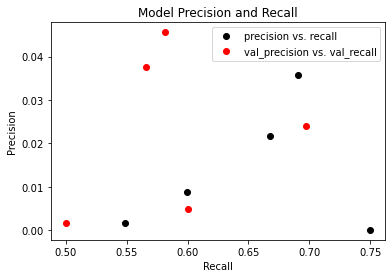

10/10 [==============================] - ETA: 1s - loss: 3.7805 - accuracy: 0.1875 - auc: 0.8591 - precision: 0.5714 - recall: 0.0312 - F1_Score: 0.05 - ETA: 0s - loss: 3.6724 - accuracy: 0.2070 - auc: 0.8788 - precision: 0.5625 - recall: 0.0352 - F1_Score: 0.06 - ETA: 0s - loss: 3.6198 - accuracy: 0.1901 - auc: 0.8857 - precision: 0.5769 - recall: 0.0391 - F1_Score: 0.07 - ETA: 0s - loss: 3.5846 - accuracy: 0.1953 - auc: 0.8893 - precision: 0.5938 - recall: 0.0371 - F1_Score: 0.06 - ETA: 0s - loss: 3.5519 - accuracy: 0.2078 - auc: 0.8891 - precision: 0.6136 - recall: 0.0422 - F1_Score: 0.07 - ETA: 0s - loss: 3.5511 - accuracy: 0.2096 - auc: 0.8919 - precision: 0.6383 - recall: 0.0391 - F1_Score: 0.07 - ETA: 0s - loss: 3.5712 - accuracy: 0.2121 - auc: 0.8867 - precision: 0.6207 - recall: 0.0402 - F1_Score: 0.07 - ETA: 0s - loss: 3.6074 - accuracy: 0.2080 - auc: 0.8837 - precision: 0.6232 - recall: 0.0420 - F1_Score: 0.07 - ETA: 0s - loss: 3.6061 - accuracy: 0.2049 - auc: 0.8843 - preci

In [26]:
unit_list=[1920, 1664, 1792, 1152, 1280, 1024, 1536, 1280, 896, 1408, 1792, 768, 1920, 1024, 896, 640, 640, 2048, 512, 1664]
lr_list=[0.0001,0.0001, 0.0001, 0.0001, 0.001, 0.0001,0.001, 0.0001, 0.0001, 0.0001,  0.001, 0.0001, 0.001, 0.001, 0.001, 0.0001, 0.001, 0.001, 0.0001, 0.001]
models = []
for m in range(2):
    m = create_model(unit_list[m], lr_list[m])
    models.append(m)
    plot_p_r(m, 5)
    evaluate(m)
